In [1]:
#!pip install xlrd>=2.0.1
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics
from scipy.stats import shapiro
from sklearn.decomposition import PCA

In [2]:
co2mt_df=pd.read_csv(r'C:\Users\freed\Desktop\DAT\DAT4\BI\exam project\ExamBI\data\GCB2022v27_MtCO2_flat.csv', header=0)
co2pc_df=pd.read_csv(r'C:\Users\freed\Desktop\DAT\DAT4\BI\exam project\ExamBI\data\GCB2022v27_percapita_flat.csv', header=0)

In [3]:
co2mt_df.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

In [4]:
co2mt_df.shape

(63104, 11)

In [5]:
co2pc_df.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
dtype: object

In [6]:
# Check for missing values
print(co2mt_df.isnull().sum())

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64


In [7]:
# Drop rows with missing values
co2mt_df = co2mt_df.dropna()

In [8]:
# Check for missing values
print(co2mt_df.isnull().sum())

Country               0
ISO 3166-1 alpha-3    0
Year                  0
Total                 0
Coal                  0
Oil                   0
Gas                   0
Cement                0
Flaring               0
Other                 0
Per Capita            0
dtype: int64


In [9]:
# Descriptive statistics
co2mt_df.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000
mean,2001.781964,1187.296340,508.712137,408.406118,212.096983,36.636146,10.486806,10.958149,8.921079
std,17.385259,4348.889189,1826.577854,1547.737250,819.851493,170.022629,47.239932,39.045185,4.705260
min,1904.000000,0.141996,0.000000,0.093291,0.000011,0.000000,0.000000,0.000000,0.604760
25%,1996.000000,38.908676,6.340344,16.067400,5.518171,0.686589,0.008374,0.523691,5.779495
50%,2004.000000,111.280674,33.213779,38.181343,18.721663,2.309659,0.286938,1.255637,8.007169
75%,2013.000000,459.921985,165.875303,197.338813,82.868263,10.681128,2.863092,4.386426,11.120610
max,2021.000000,37123.850352,15051.512770,12345.653374,7921.829472,1672.592372,439.253991,306.638573,32.202855


In [10]:
co2mt_df.shape

(1619, 11)

In [11]:
co2mt_df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
3232,Australia,AUS,1990,278.154156,141.879819,88.842090,34.454816,3.462872,7.272496,2.242063,16.315938
3233,Australia,AUS,1991,279.528510,146.082840,88.245572,32.786243,3.183033,7.001201,2.229622,16.184767
3234,Australia,AUS,1992,284.525345,150.051381,87.916828,33.970472,2.923411,7.303701,2.359551,16.293502
3235,Australia,AUS,1993,288.870537,150.098575,90.386578,35.670002,3.004698,7.136743,2.573941,16.383765
3236,Australia,AUS,1994,293.696553,151.376241,91.924087,37.032005,3.484276,6.880148,2.999795,16.494706


In [12]:
# Display the column titles
column_titles = co2mt_df.columns
print("Column Titles:", column_titles)

Column Titles: Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')


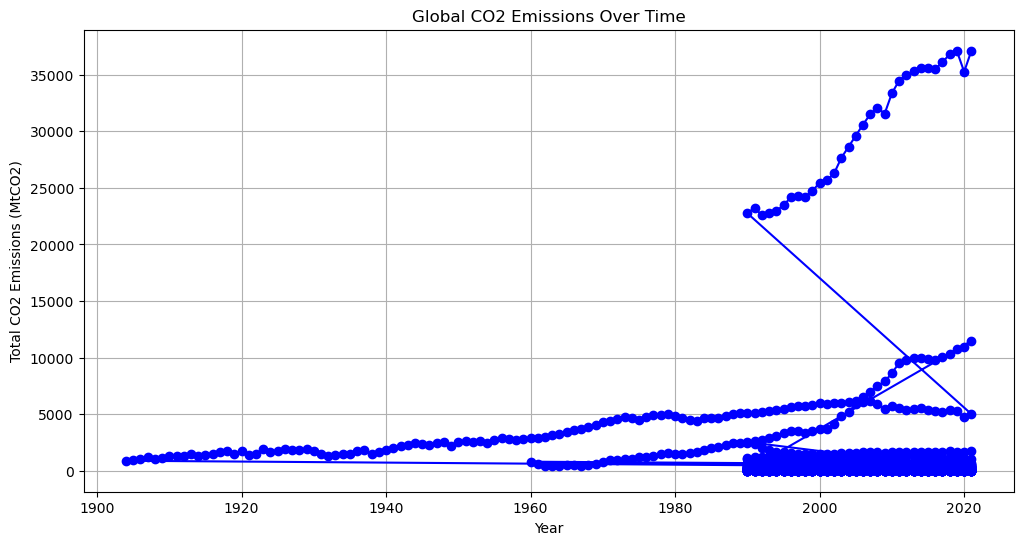

In [13]:
# Visualize CO2 emissions over time
plt.figure(figsize=(12, 6))
plt.plot(co2mt_df['Year'], co2mt_df['Total'], marker='o', linestyle='-', color='b')
plt.title('Global CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (MtCO2)')
plt.grid(True)
plt.show()

In [14]:
co2pc_df.shape

(63104, 10)

In [15]:
# Check for missing values
print(co2pc_df.isnull().sum())

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                 44132
Coal                  45966
Oil                   46065
Gas                   46092
Cement                47656
Flaring               46160
Other                 61484
dtype: int64


In [16]:
co2pc_df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other
0,Afghanistan,AFG,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Drop rows with missing values
co2pc_df = co2mt_df.dropna()

In [18]:
# Explore basic statistics
print(co2pc_df.describe())

              Year         Total          Coal           Oil          Gas  \
count  1619.000000   1619.000000   1619.000000   1619.000000  1619.000000   
mean   2001.781964   1187.296340    508.712137    408.406118   212.096983   
std      17.385259   4348.889189   1826.577854   1547.737250   819.851493   
min    1904.000000      0.141996      0.000000      0.093291     0.000011   
25%    1996.000000     38.908676      6.340344     16.067400     5.518171   
50%    2004.000000    111.280674     33.213779     38.181343    18.721663   
75%    2013.000000    459.921985    165.875303    197.338813    82.868263   
max    2021.000000  37123.850352  15051.512770  12345.653374  7921.829472   

            Cement      Flaring        Other   Per Capita  
count  1619.000000  1619.000000  1619.000000  1619.000000  
mean     36.636146    10.486806    10.958149     8.921079  
std     170.022629    47.239932    39.045185     4.705260  
min       0.000000     0.000000     0.000000     0.604760  
25%   

In [19]:
# Display the column titles
column_titles = co2pc_df.columns
print("Column Titles:", column_titles)

Column Titles: Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')


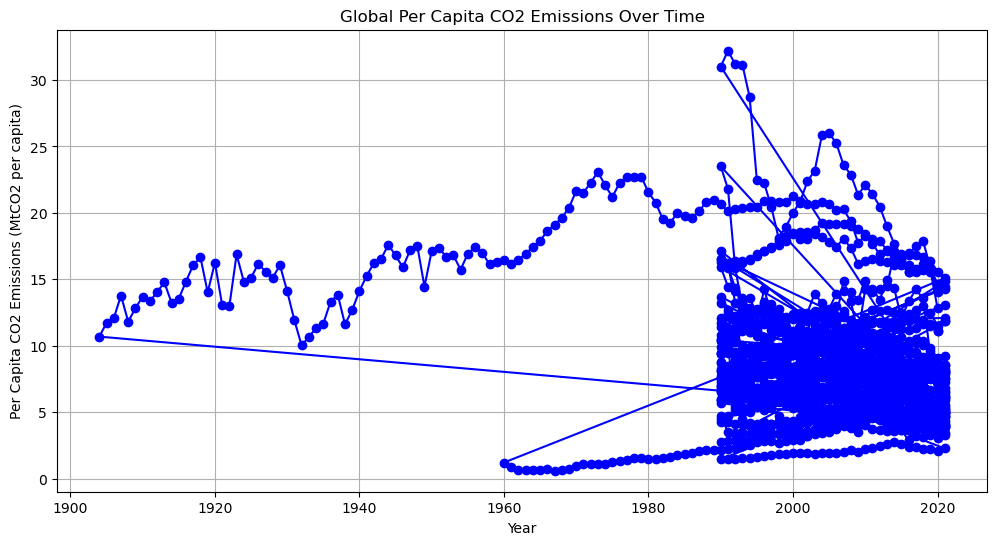

In [20]:
# Plot per capita CO2 emissions over time
plt.figure(figsize=(12, 6))
plt.plot(co2pc_df['Year'], co2pc_df['Per Capita'], marker='o', linestyle='-', color='b')
plt.title('Global Per Capita CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Per Capita CO2 Emissions (MtCO2 per capita)')
plt.grid(True)
plt.show()

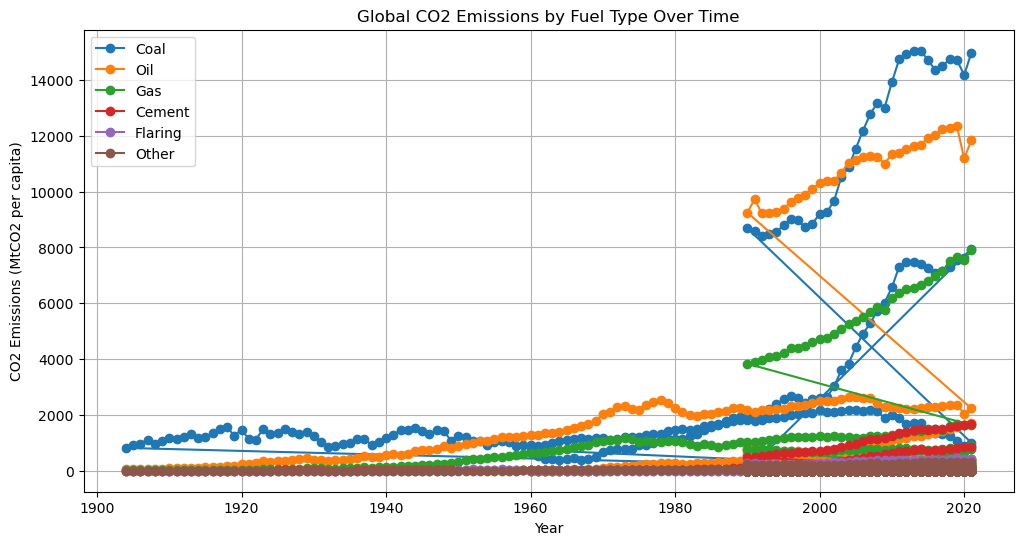

In [21]:
# Plot line chart for each fuel type over time
plt.figure(figsize=(12, 6))
plt.plot(co2pc_df['Year'], co2pc_df['Coal'], label='Coal', marker='o')
plt.plot(co2pc_df['Year'], co2pc_df['Oil'], label='Oil', marker='o')
plt.plot(co2pc_df['Year'], co2pc_df['Gas'], label='Gas', marker='o')
plt.plot(co2pc_df['Year'], co2pc_df['Cement'], label='Cement', marker='o')
plt.plot(co2pc_df['Year'], co2pc_df['Flaring'], label='Flaring', marker='o')
plt.plot(co2pc_df['Year'], co2pc_df['Other'], label='Other', marker='o')
plt.title('Global CO2 Emissions by Fuel Type Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (MtCO2 per capita)')
plt.legend()
plt.grid(True)
plt.show()

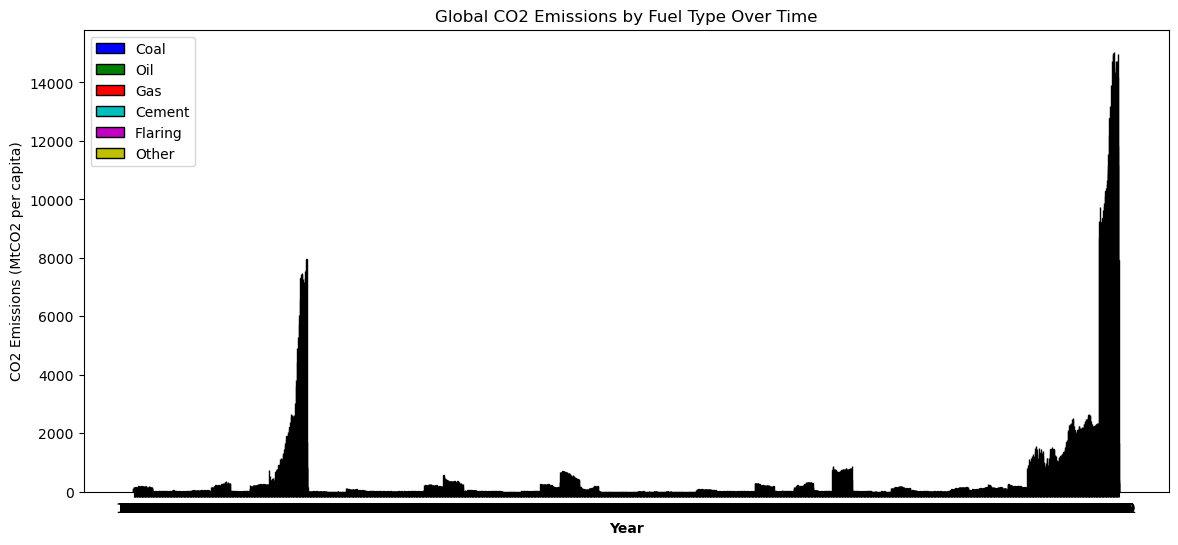

In [22]:
# Grouped bar chart for each fuel type over time
barWidth = 0.2  # Increase the bar width
space = 0.2     # Increase the space between groups
r1 = np.arange(len(co2pc_df['Year']))

plt.figure(figsize=(14, 6))

plt.bar(r1, co2pc_df['Coal'], color='b', width=barWidth, edgecolor='black', label='Coal')
plt.bar(r1 + barWidth + space, co2pc_df['Oil'], color='g', width=barWidth, edgecolor='black', label='Oil')
plt.bar(r1 + 2 * (barWidth + space), co2pc_df['Gas'], color='r', width=barWidth, edgecolor='black', label='Gas')
plt.bar(r1 + 3 * (barWidth + space), co2pc_df['Cement'], color='c', width=barWidth, edgecolor='black', label='Cement')
plt.bar(r1 + 4 * (barWidth + space), co2pc_df['Flaring'], color='m', width=barWidth, edgecolor='black', label='Flaring')
plt.bar(r1 + 5 * (barWidth + space), co2pc_df['Other'], color='y', width=barWidth, edgecolor='black', label='Other')

plt.xlabel('Year', fontweight='bold')
plt.xticks([r + 2.5 * (barWidth + space) for r in range(len(co2pc_df['Year']))], co2pc_df['Year'])
plt.title('Global CO2 Emissions by Fuel Type Over Time')
plt.ylabel('CO2 Emissions (MtCO2 per capita)')
plt.legend()
plt.show()


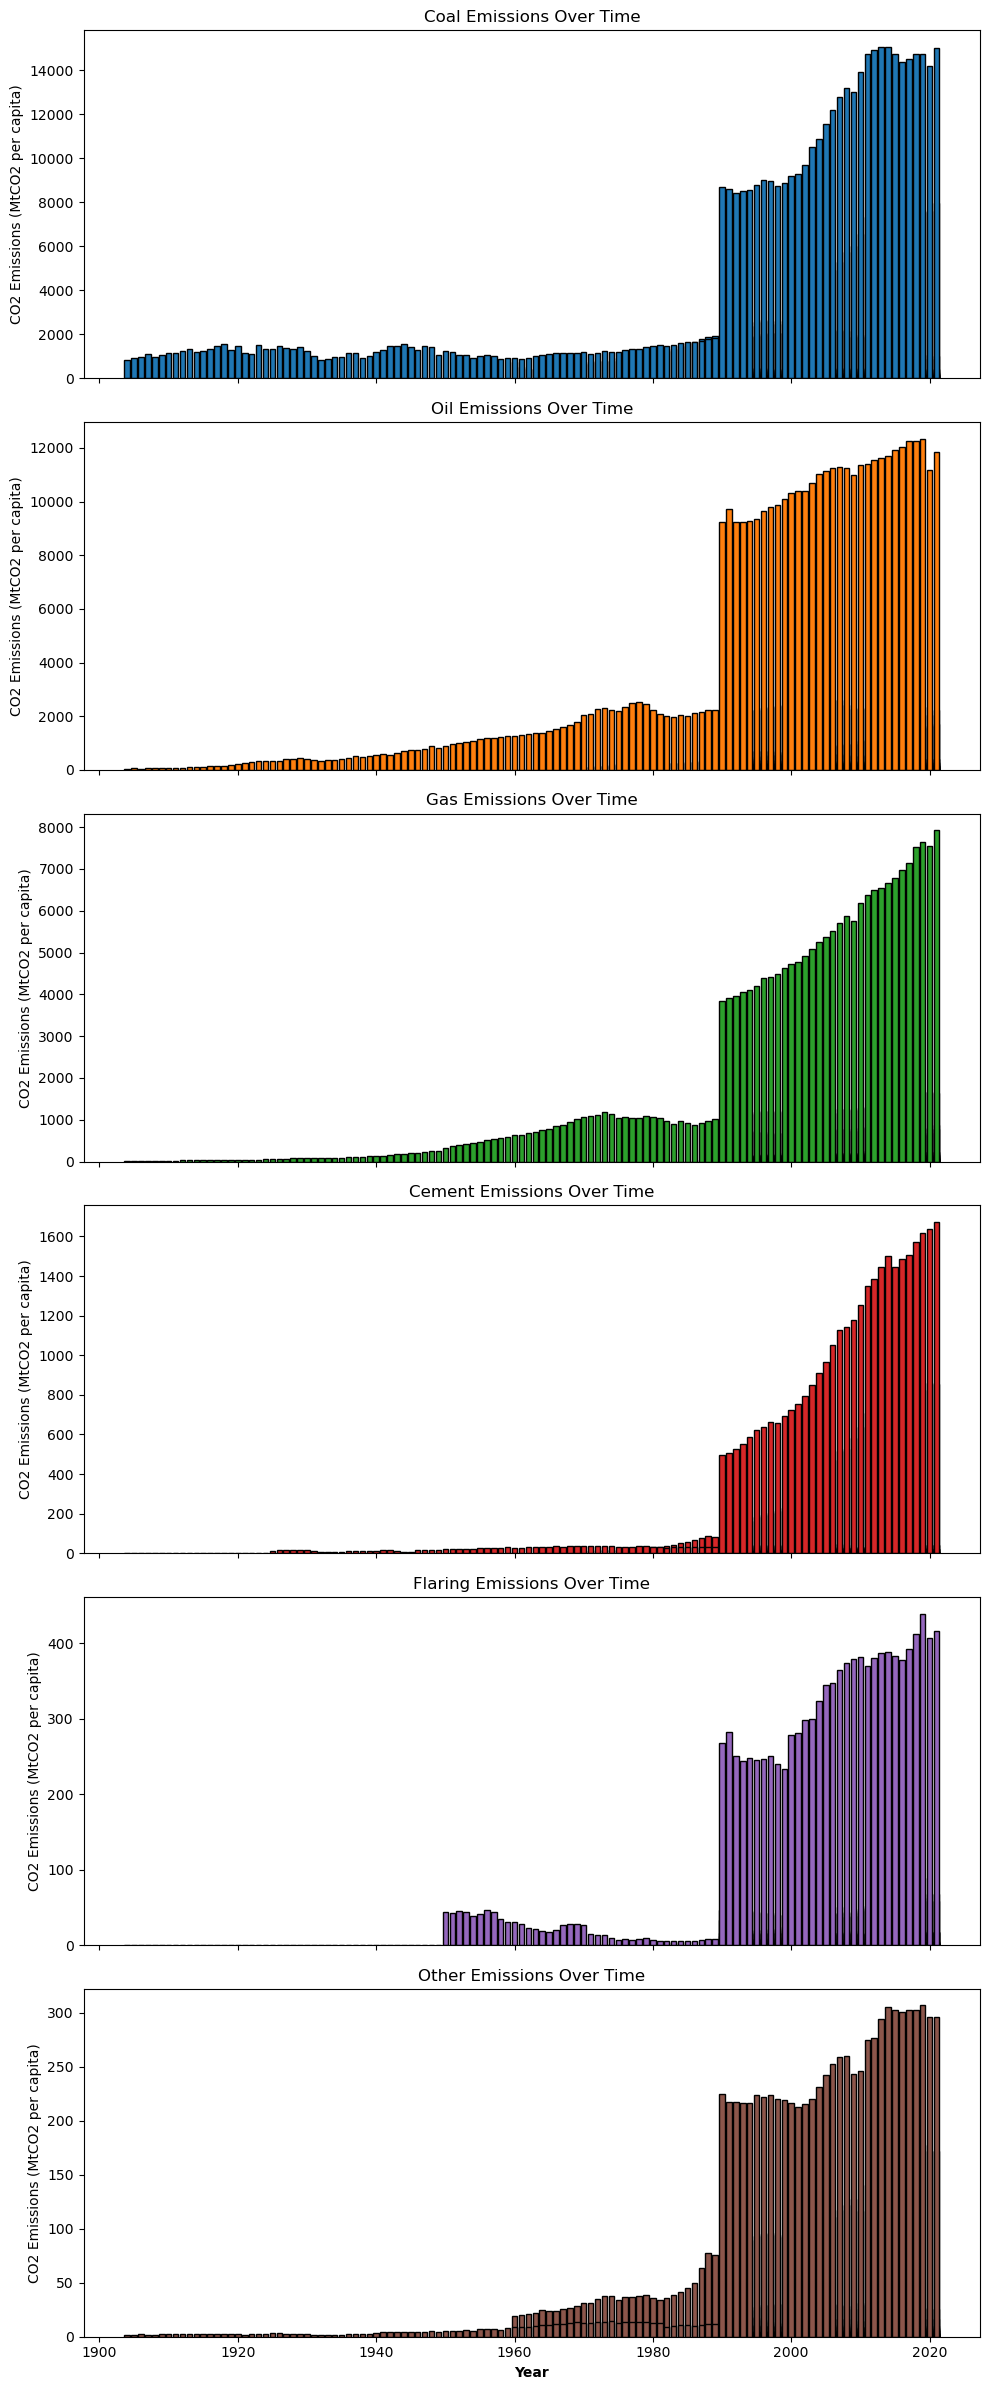

In [23]:
# List of fuel types
fuel_types = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']

# Create subplots
fig, axes = plt.subplots(nrows=len(fuel_types), ncols=1, figsize=(10, 4 * len(fuel_types)), sharex=True)

# Plot individual bar charts for each fuel type
for i, fuel_type in enumerate(fuel_types):
    axes[i].bar(co2pc_df['Year'], co2pc_df[fuel_type], color='C{}'.format(i), edgecolor='black')
    axes[i].set_ylabel('CO2 Emissions (MtCO2 per capita)')
    axes[i].set_title('{} Emissions Over Time'.format(fuel_type))

# Set common xlabel
plt.xlabel('Year', fontweight='bold')

plt.tight_layout()
plt.show()


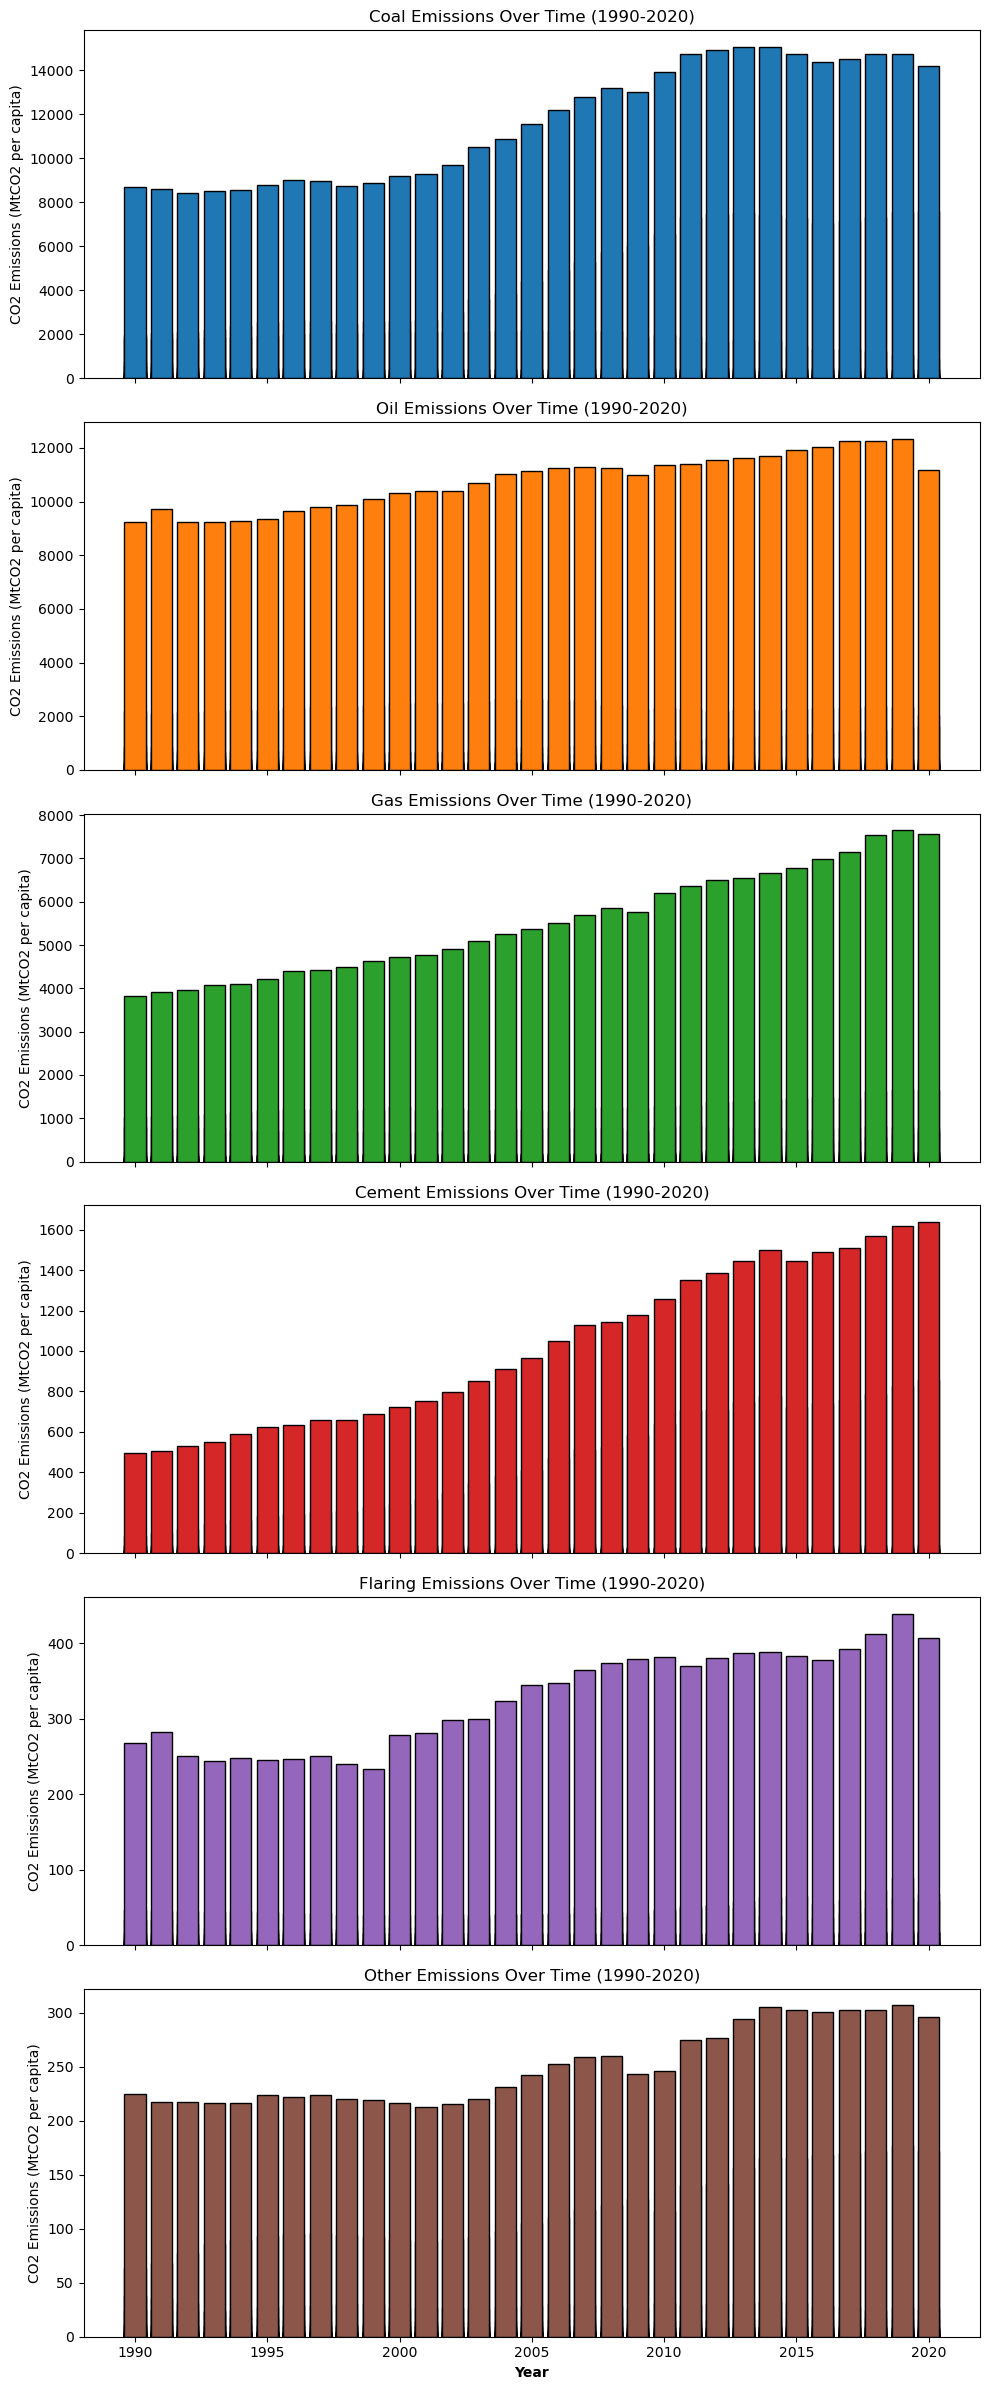

In [24]:
# Filter the DataFrame for the years 1990 to 2020
filtered_df = co2pc_df[(co2pc_df['Year'] >= 1990) & (co2pc_df['Year'] <= 2020)]

# List of fuel types
fuel_types = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']

# Create subplots
fig, axes = plt.subplots(nrows=len(fuel_types), ncols=1, figsize=(10, 4 * len(fuel_types)), sharex=True)

# Plot individual bar charts for each fuel type
for i, fuel_type in enumerate(fuel_types):
    axes[i].bar(filtered_df['Year'], filtered_df[fuel_type], color='C{}'.format(i), edgecolor='black')
    axes[i].set_ylabel('CO2 Emissions (MtCO2 per capita)')
    axes[i].set_title('{} Emissions Over Time (1990-2020)'.format(fuel_type))

# Set common xlabel
plt.xlabel('Year', fontweight='bold')

plt.tight_layout()
plt.show()


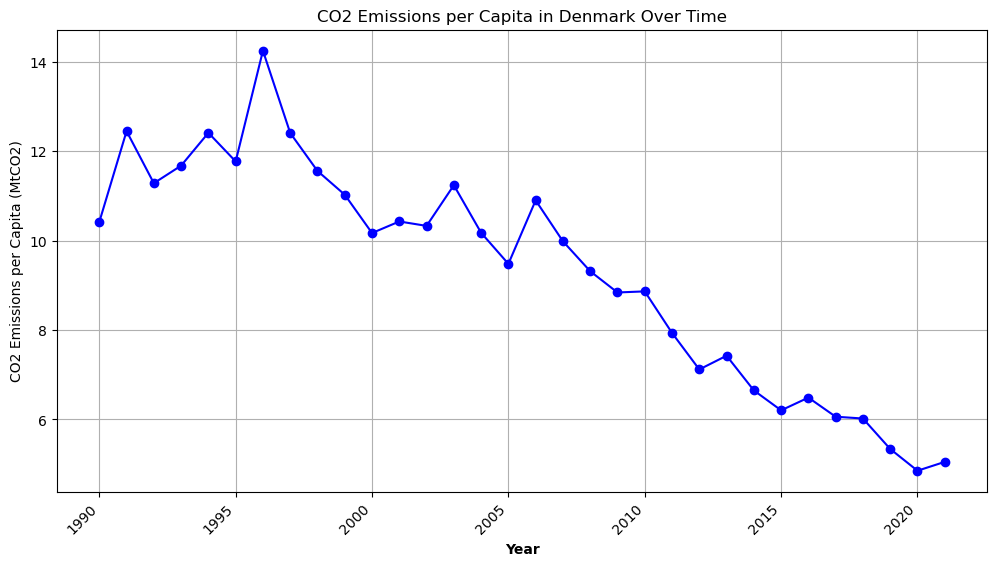

In [25]:
# Filter the DataFrame for Denmark
denmark_df = co2pc_df[co2pc_df['Country'] == 'Denmark']

# Line plot for CO2 emissions per capita in Denmark
plt.figure(figsize=(12, 6))
plt.plot(denmark_df['Year'], denmark_df['Per Capita'], marker='o', color='b')

plt.xlabel('Year', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.title('CO2 Emissions per Capita in Denmark Over Time')
plt.ylabel('CO2 Emissions per Capita (MtCO2)')
plt.grid(True)
plt.show()


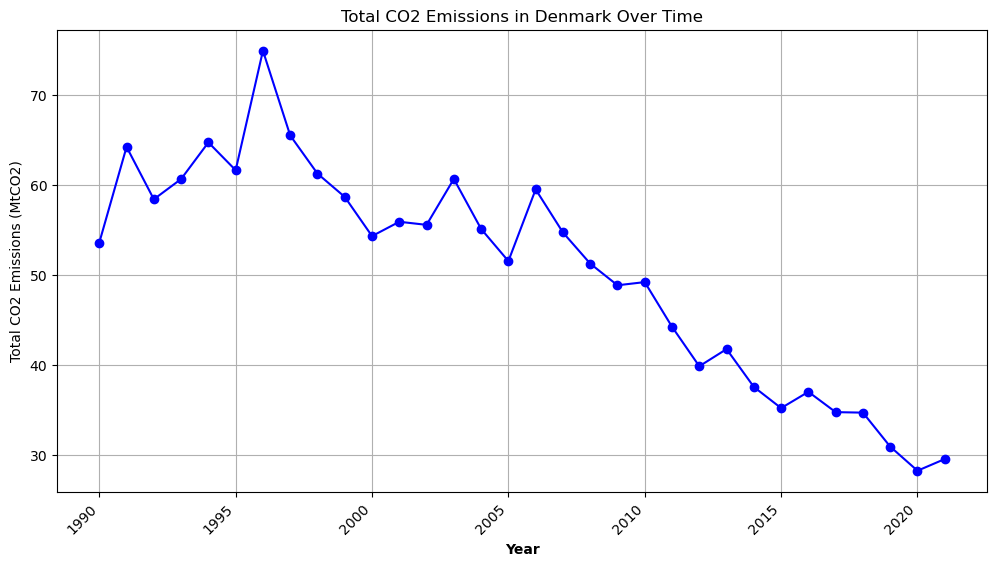

In [26]:
# Filter the DataFrame for Denmark
denmark_mt_df = co2mt_df[co2mt_df['Country'] == 'Denmark']

# Line plot for total CO2 emissions in Denmark
plt.figure(figsize=(12, 6))
plt.plot(denmark_mt_df['Year'], denmark_mt_df['Total'], marker='o', color='b')

plt.xlabel('Year', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.title('Total CO2 Emissions in Denmark Over Time')
plt.ylabel('Total CO2 Emissions (MtCO2)')
plt.grid(True)
plt.show()

In [27]:
# Display unique values in the 'Country' column
unique_countries = co2mt_df['Country'].unique()
print("Unique Countries in the Dataset:")
print(unique_countries)


Unique Countries in the Dataset:
['Australia' 'Austria' 'Belarus' 'Belgium' 'Brazil' 'Bulgaria' 'Canada'
 'China' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan'
 'Kazakhstan' 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Malta'
 'Netherlands' 'New Zealand' 'Norway' 'Poland' 'Portugal' 'South Korea'
 'Romania' 'Russia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Taiwan' 'Turkey' 'Ukraine' 'United Kingdom' 'USA' 'Global']


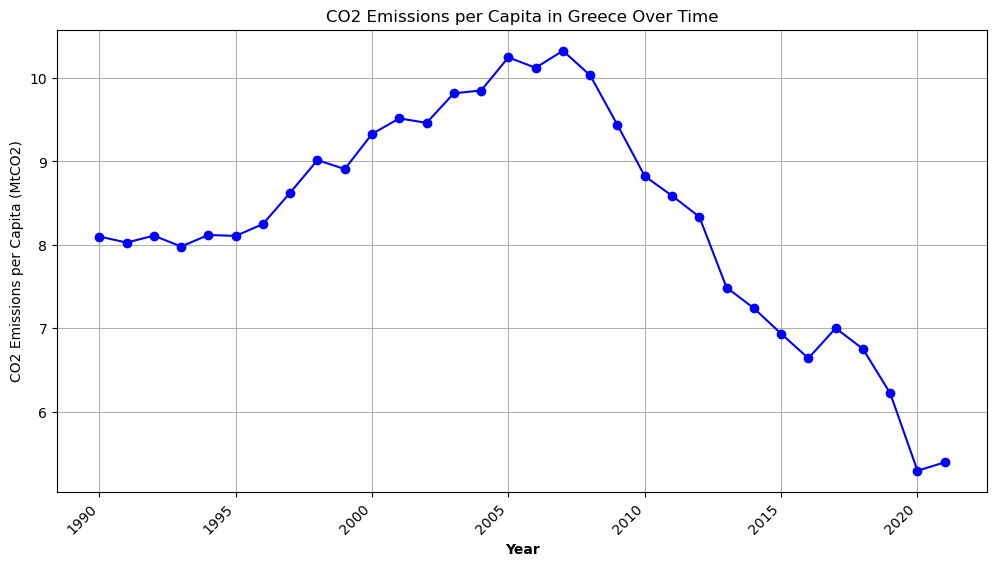

In [28]:
# Filter the DataFrame for Greece
greece_pc_df = co2pc_df[co2pc_df['Country'] == 'Greece']

# Line plot for CO2 emissions per capita in Greece
plt.figure(figsize=(12, 6))
plt.plot(greece_pc_df['Year'], greece_pc_df['Per Capita'], marker='o', color='b')

plt.xlabel('Year', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.title('CO2 Emissions per Capita in Greece Over Time')
plt.ylabel('CO2 Emissions per Capita (MtCO2)')
plt.grid(True)
plt.show()

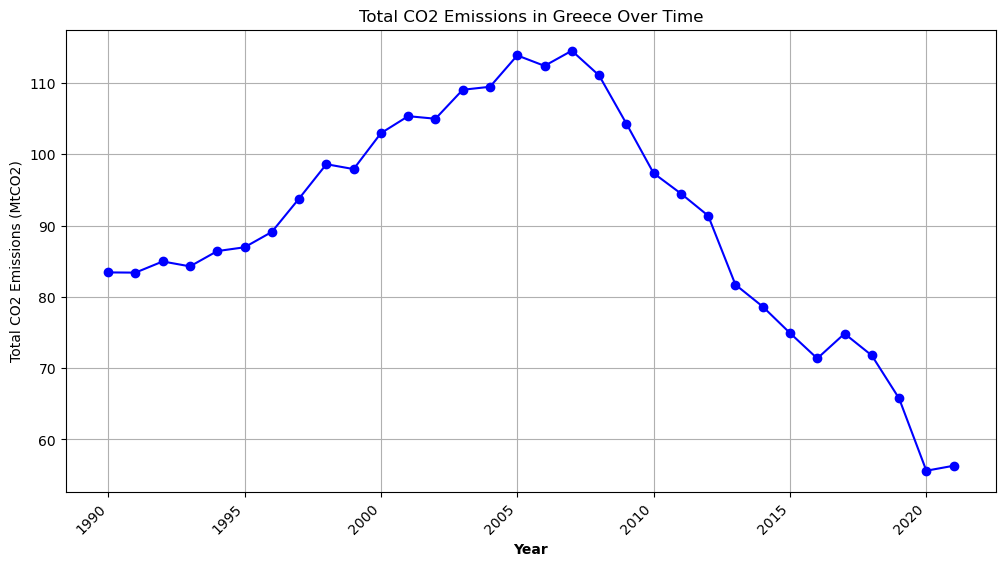

In [29]:
# Filter the DataFrame for Greece
greece_mt_df = co2mt_df[co2mt_df['Country'] == 'Greece']

# Line plot for total CO2 emissions in Greece
plt.figure(figsize=(12, 6))
plt.plot(greece_mt_df['Year'], greece_mt_df['Total'], marker='o', color='b')

plt.xlabel('Year', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.title('Total CO2 Emissions in Greece Over Time')
plt.ylabel('Total CO2 Emissions (MtCO2)')
plt.grid(True)
plt.show()

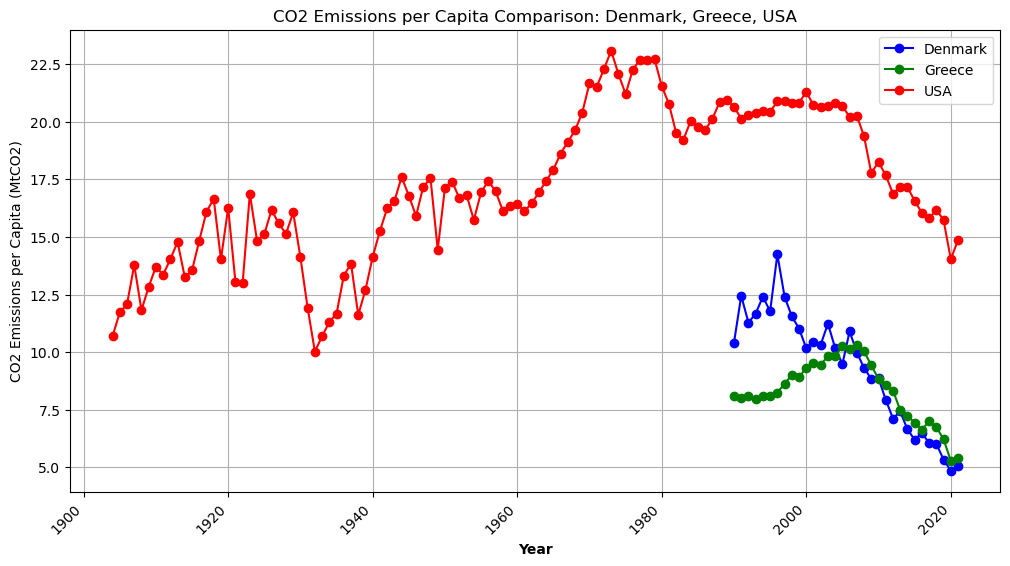

In [30]:
# Filter the DataFrame for Denmark, Greece, and the USA
denmark_pc_df = co2pc_df[co2pc_df['Country'] == 'Denmark']
greece_pc_df = co2pc_df[co2pc_df['Country'] == 'Greece']
usa_pc_df = co2pc_df[co2pc_df['Country'] == 'USA']

# Line plot for CO2 emissions per capita comparison
plt.figure(figsize=(12, 6))
plt.plot(denmark_pc_df['Year'], denmark_pc_df['Per Capita'], marker='o', label='Denmark', color='b')
plt.plot(greece_pc_df['Year'], greece_pc_df['Per Capita'], marker='o', label='Greece', color='g')
plt.plot(usa_pc_df['Year'], usa_pc_df['Per Capita'], marker='o', label='USA', color='r')

plt.xlabel('Year', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.title('CO2 Emissions per Capita Comparison: Denmark, Greece, USA')
plt.ylabel('CO2 Emissions per Capita (MtCO2)')
plt.legend()
plt.grid(True)
plt.show()

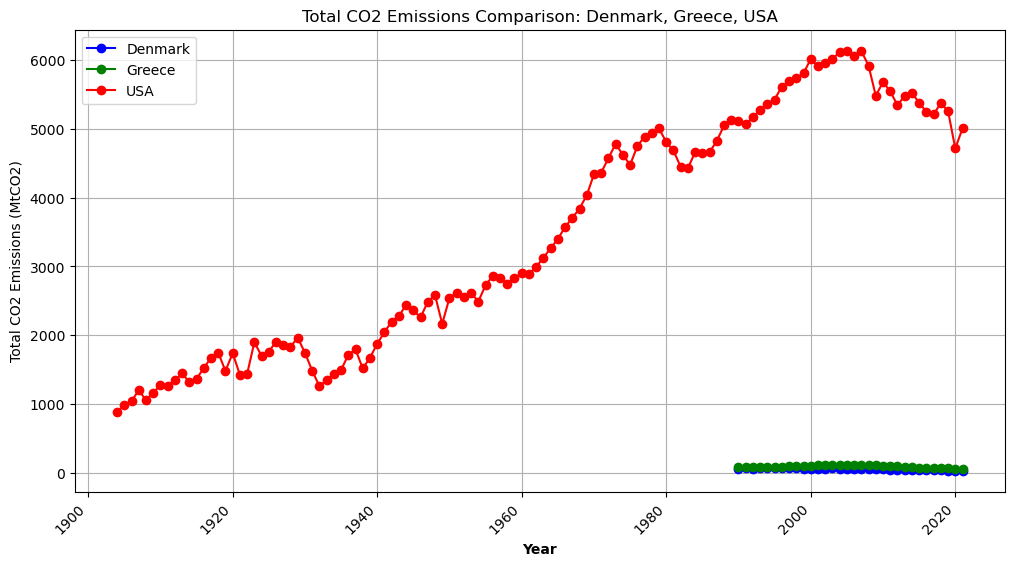

In [31]:
# Filter the DataFrame for Denmark, Greece, and the USA
denmark_mt_df = co2mt_df[co2mt_df['Country'] == 'Denmark']
greece_mt_df = co2mt_df[co2mt_df['Country'] == 'Greece']
usa_mt_df = co2mt_df[co2mt_df['Country'] == 'USA']

# Line plot for total CO2 emissions comparison
plt.figure(figsize=(12, 6))
plt.plot(denmark_mt_df['Year'], denmark_mt_df['Total'], marker='o', label='Denmark', color='b')
plt.plot(greece_mt_df['Year'], greece_mt_df['Total'], marker='o', label='Greece', color='g')
plt.plot(usa_mt_df['Year'], usa_mt_df['Total'], marker='o', label='USA', color='r')

plt.xlabel('Year', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.title('Total CO2 Emissions Comparison: Denmark, Greece, USA')
plt.ylabel('Total CO2 Emissions (MtCO2)')
plt.legend()
plt.grid(True)
plt.show()


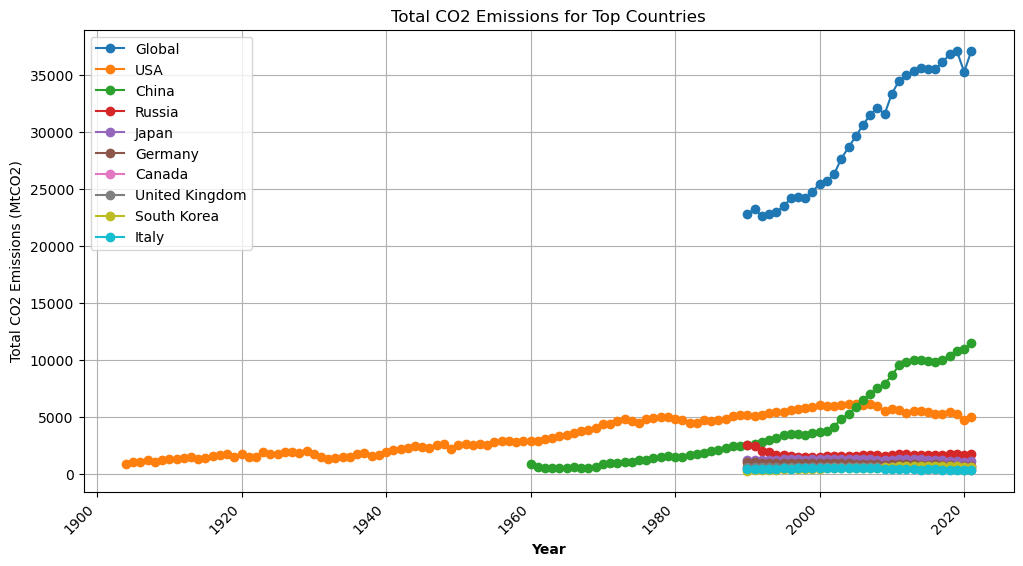

In [32]:
# Aggregate data by summing total CO2 emissions for each country
total_emissions_by_country = co2mt_df.groupby('Country')['Total'].sum()

# Select the top N countries with the highest total emissions
top_countries = total_emissions_by_country.nlargest(10)  # Change 10 to the desired number of countries

# Filter the original DataFrame for the selected top countries
top_countries_df = co2mt_df[co2mt_df['Country'].isin(top_countries.index)]

# Line plot for total CO2 emissions for the top countries
plt.figure(figsize=(12, 6))
for country in top_countries.index:
    country_data = top_countries_df[top_countries_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Total'], marker='o', label=country)

plt.xlabel('Year', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.title('Total CO2 Emissions for Top Countries')
plt.ylabel('Total CO2 Emissions (MtCO2)')
plt.legend()
plt.grid(True)
plt.show()

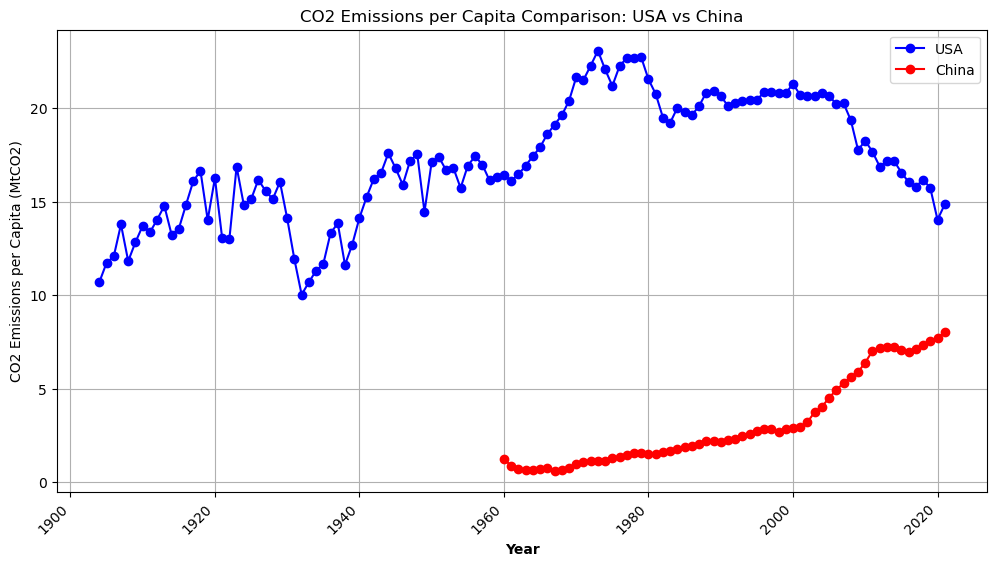

In [33]:
# Filter the DataFrame for the USA and China
usa_pc_df = co2pc_df[co2pc_df['Country'] == 'USA']
china_pc_df = co2pc_df[co2pc_df['Country'] == 'China']

# Line plot for CO2 emissions per capita comparison between the USA and China
plt.figure(figsize=(12, 6))
plt.plot(usa_pc_df['Year'], usa_pc_df['Per Capita'], marker='o', label='USA', color='b')
plt.plot(china_pc_df['Year'], china_pc_df['Per Capita'], marker='o', label='China', color='r')

plt.xlabel('Year', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.title('CO2 Emissions per Capita Comparison: USA vs China')
plt.ylabel('CO2 Emissions per Capita (MtCO2)')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Group by country and find the minimum year for each
min_years_by_country = co2pc_df.groupby('Country')['Year'].min()

# Filter countries with data before 1990
countries_with_early_data = min_years_by_country[min_years_by_country <= 1989].index

# Print the list of countries
print("Countries with Data from 1989 and Before:")
print(countries_with_early_data)


Countries with Data from 1989 and Before:
Index(['China', 'USA'], dtype='object', name='Country')


In [35]:
# Display data types of each column
print(co2pc_df.dtypes)


Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object


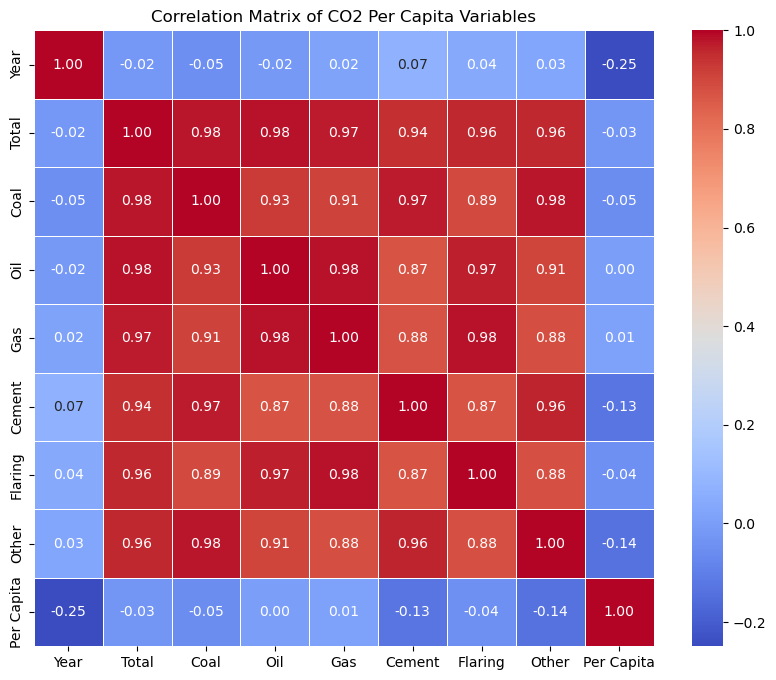

In [36]:
# Select relevant numeric columns for correlation analysis
numeric_columns = ['Year', 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita']

# Create a correlation matrix
correlation_matrix = co2pc_df[numeric_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of CO2 Per Capita Variables')
plt.show()

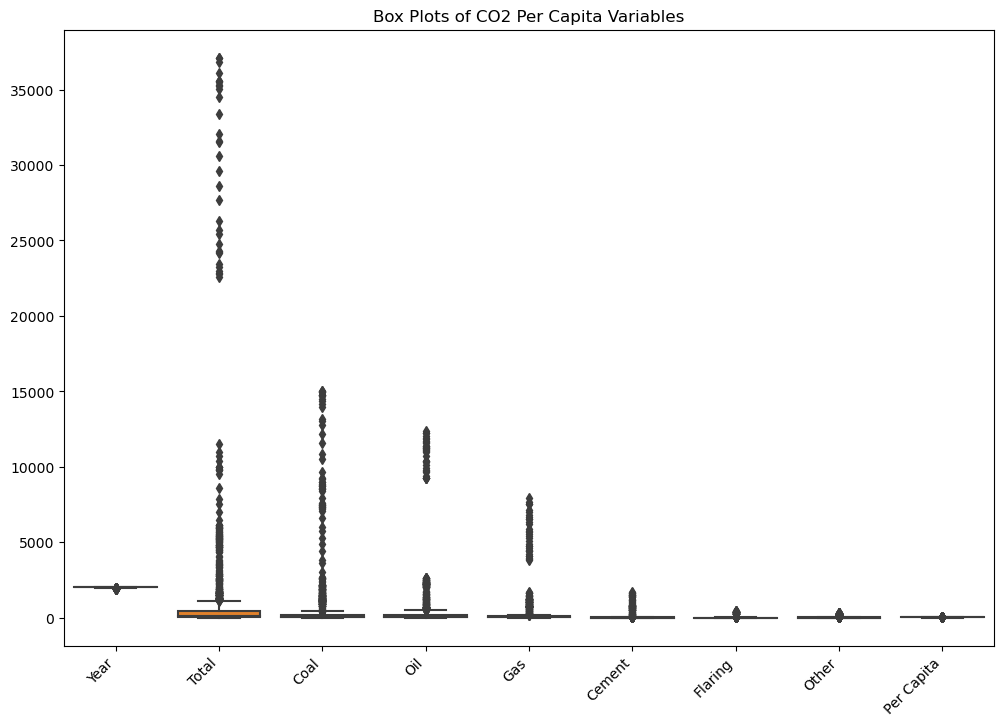

In [37]:
# Create box plots for each numeric column
plt.figure(figsize=(12, 8))
sns.boxplot(data=co2pc_df[numeric_columns])
plt.title('Box Plots of CO2 Per Capita Variables')
plt.xticks(rotation=45, ha='right')
plt.show()

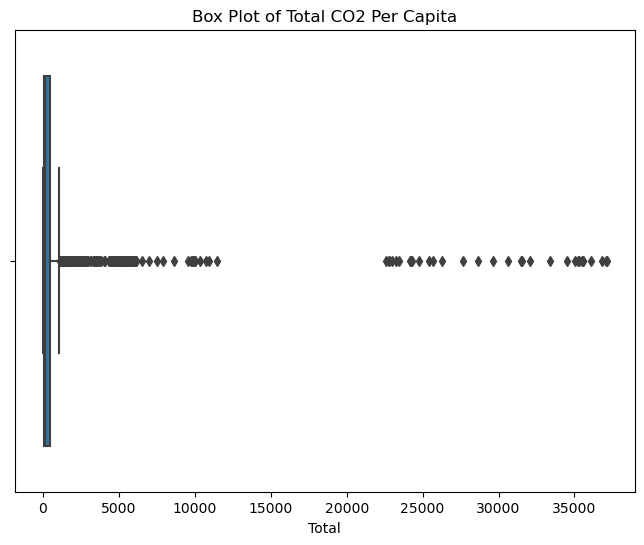

In [38]:
# Create a box plot for the 'Total' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=co2pc_df['Total'])
plt.title('Box Plot of Total CO2 Per Capita')
plt.show()

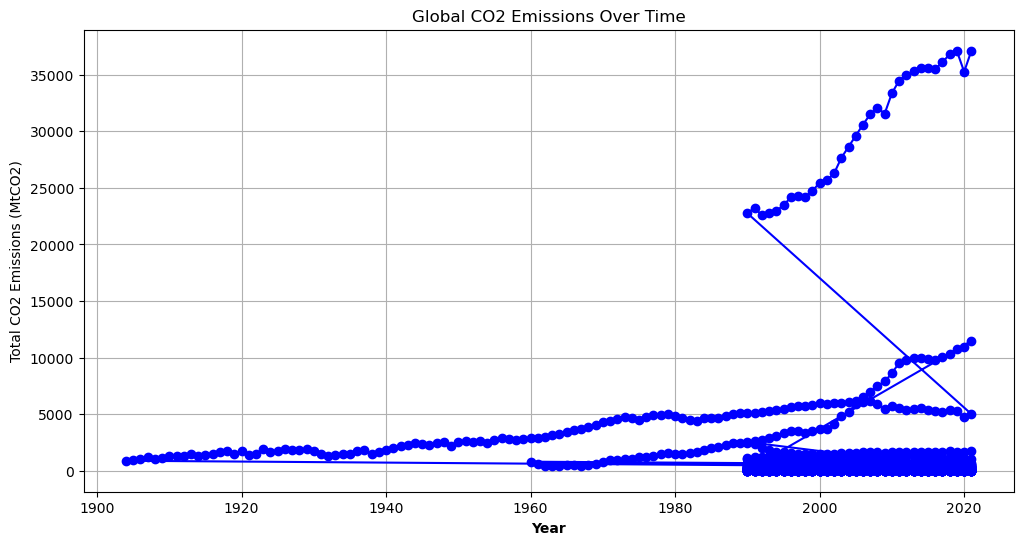

In [39]:
# Global emissions
plt.figure(figsize=(12, 6))
plt.plot(co2mt_df['Year'], co2mt_df['Total'], marker='o', color='b')
plt.title('Global CO2 Emissions Over Time')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Total CO2 Emissions (MtCO2)')
plt.grid(True)
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

In [42]:
#Supervised
features = ['Year', 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']
target = 'Per Capita'

In [43]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(co2pc_df, test_size=0.2, random_state=42)


In [44]:
# Separate features and target variable in the training set
X_train = train_data[features]
y_train = train_data[target]

In [45]:
# Separate features and target variable in the testing set
X_test = test_data[features]
y_test = test_data[target]

In [46]:
# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
# Save the trained model to a file
model_filename = 'linear_regression_model.joblib'
joblib.dump(model, model_filename)
print(f'Trained model saved to {model_filename}')

Trained model saved to linear_regression_model.joblib


In [48]:
# Predictions on the test set
predictions = model.predict(X_test)

In [49]:
# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 13.066886883261478


In [50]:
#Unsupervised

In [51]:
from sklearn.cluster import KMeans

In [52]:
# Choose the number of clusters (e.g., 3 for demonstration)
num_clusters = 3


In [53]:
# Select features for clustering (modify as needed)
clustering_features = ['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']


In [54]:
# Fit K-means clustering model
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
co2pc_df['Cluster'] = kmeans_model.fit_predict(co2pc_df[clustering_features])

C:\Users\freed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\freed\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\freed\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\freed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

In [55]:
from sklearn.metrics import silhouette_score
# Calculate silhouette score
silhouette_avg = silhouette_score(co2pc_df[clustering_features], co2pc_df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.8802887764526486


In [56]:
# Silhouette Score
# 0.71-1.0: A strong structure has been found.
# 0.51-0.70: A reasonable structure has been found.
# 0.26-0.50: The structure is weak and could be artificial.
# < 0.25: No substantial structure has been found.


C:\Users\freed\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


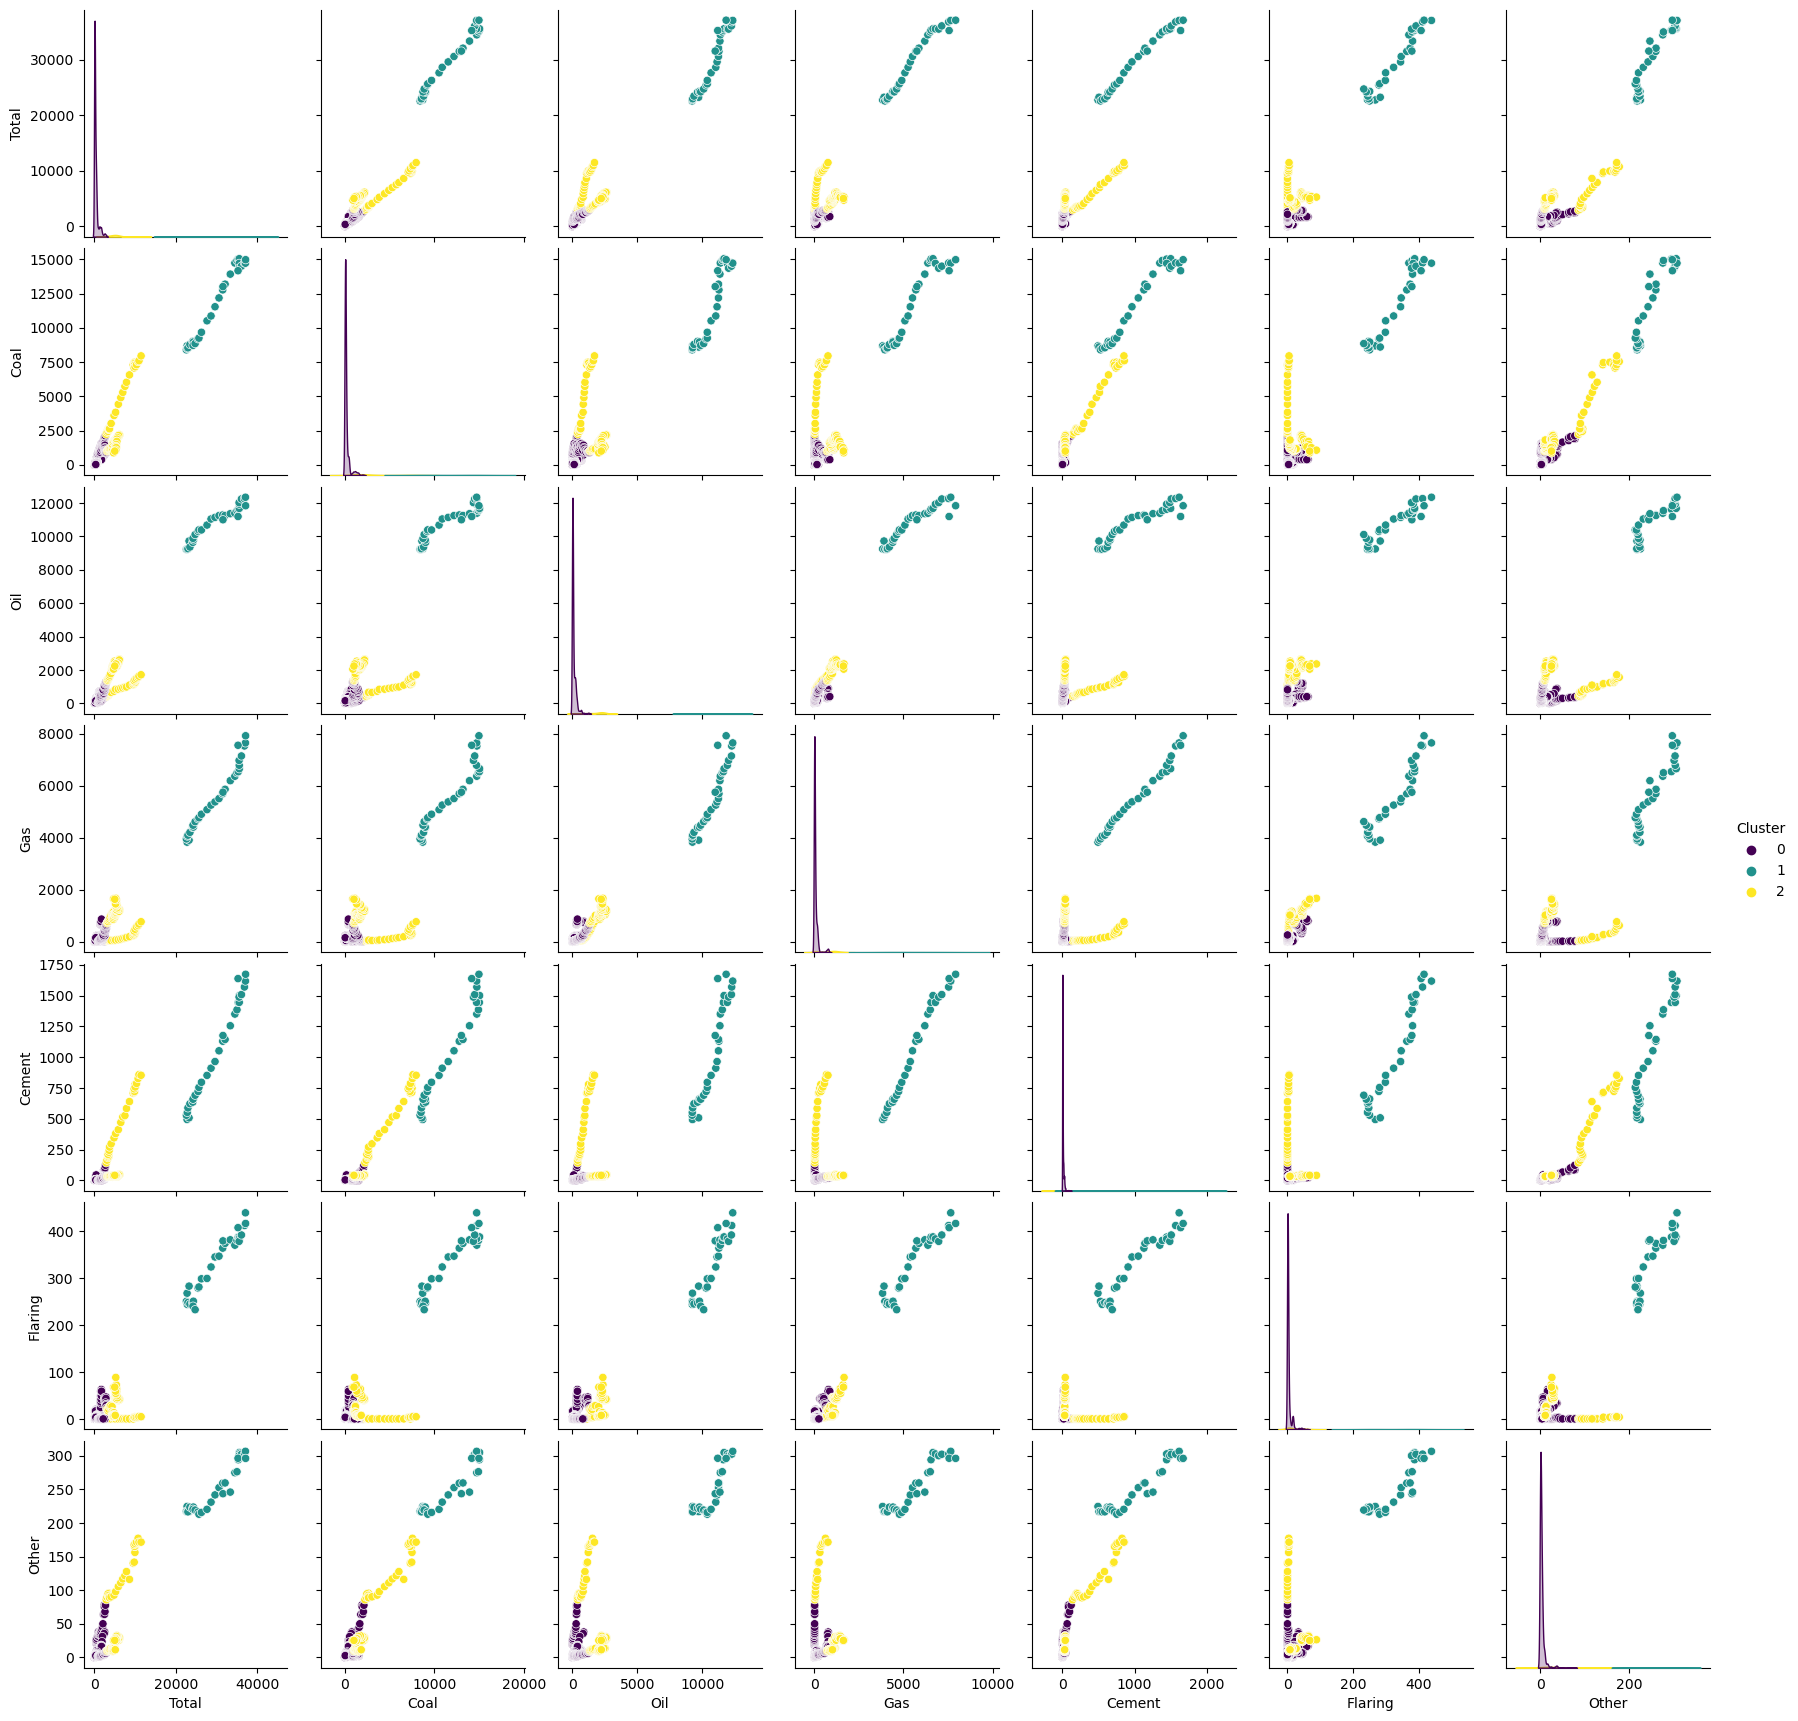

In [57]:
# Visualize cluster assignments
sns.pairplot(co2pc_df, hue='Cluster', vars=clustering_features, palette='viridis')
plt.show()

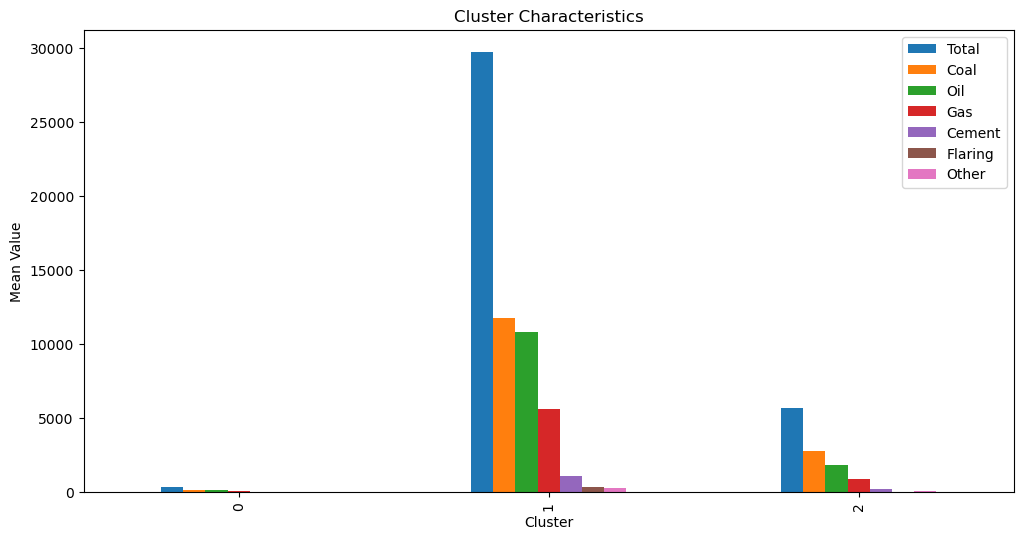

In [59]:
# Analyze Cluster Characteristics
cluster_means = co2pc_df.groupby('Cluster')[clustering_features].mean()
cluster_means.plot(kind='bar', figsize=(12, 6))
plt.title('Cluster Characteristics')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.show()


In [60]:
# Identify cluster assigments 
cluster_assignments = co2pc_df['Cluster']

In [61]:
# Replace 'Cluster' with your actual column name
cluster_0_data = co2pc_df[co2pc_df['Cluster'] == 0]
cluster_1_data = co2pc_df[co2pc_df['Cluster'] == 1]
cluster_2_data = co2pc_df[co2pc_df['Cluster'] == 2]


In [62]:
# Replace 'Feature1', 'Feature2', etc. with your actual feature names
features_of_interest = ['Total', 'Coal', 'Oil']

In [63]:
# Display mean values of features for each cluster
mean_values_by_cluster = co2pc_df.groupby('Cluster')[features_of_interest].mean()
print(mean_values_by_cluster)

                Total          Coal           Oil
Cluster                                          
0          315.703082    137.871775    105.208188
1        29734.914741  11725.376520  10801.164999
2         5653.142972   2746.853532   1793.922175


In [64]:
cluster_counts = co2pc_df['Cluster'].value_counts()

# Display the count of countries in each cluster
print("Number of Countries in Each Cluster:")
print(cluster_counts)

Number of Countries in Each Cluster:
Cluster
0    1499
2      88
1      32
Name: count, dtype: int64


In [65]:
cluster_1_countries = co2pc_df[co2pc_df['Cluster'] == 1]

In [66]:
# Display the countries in Cluster 1
print("Countries in Cluster 1:")
print(cluster_1_countries['Country'])

Countries in Cluster 1:
63072    Global
63073    Global
63074    Global
63075    Global
63076    Global
63077    Global
63078    Global
63079    Global
63080    Global
63081    Global
63082    Global
63083    Global
63084    Global
63085    Global
63086    Global
63087    Global
63088    Global
63089    Global
63090    Global
63091    Global
63092    Global
63093    Global
63094    Global
63095    Global
63096    Global
63097    Global
63098    Global
63099    Global
63100    Global
63101    Global
63102    Global
63103    Global
Name: Country, dtype: object


In [67]:
cluster_1_countries = co2pc_df[(co2pc_df['Cluster'] == 1) & (co2pc_df['Country'] != 'Global')]

In [68]:
# Display the countries in Cluster 1
print("Countries in Cluster 1:")
print(cluster_1_countries['Country'])

Countries in Cluster 1:
Series([], Name: Country, dtype: object)


In [69]:
for cluster_id in co2pc_df['Cluster'].unique():
    cluster_countries = co2pc_df[co2pc_df['Cluster'] == cluster_id]['Country'].unique()
    print(f"Cluster {cluster_id} Countries: {cluster_countries}")

Cluster 0 Countries: ['Australia' 'Austria' 'Belarus' 'Belgium' 'Brazil' 'Bulgaria' 'Canada'
 'China' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan'
 'Kazakhstan' 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Malta'
 'Netherlands' 'New Zealand' 'Norway' 'Poland' 'Portugal' 'South Korea'
 'Romania' 'Russia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Taiwan' 'Turkey' 'Ukraine' 'United Kingdom' 'USA']
Cluster 2 Countries: ['China' 'USA']
Cluster 1 Countries: ['Global']
